In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Q1**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

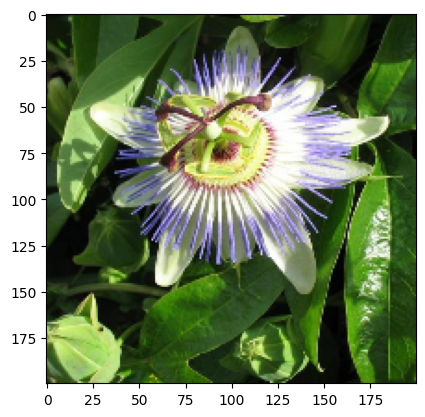

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/image_00092.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(image)

# Resize the image to a smaller dimension (e.g., 200x200)
small_image = cv2.resize(image, (200, 200))
plt.imshow(small_image)

# Reshape the smaller image to a 2D array of pixels
pixels = small_image.reshape((-1, 3))

In [ ]:
def get_random_node(x):
    return np.random.choice(x[:, 0]), np.random.choice(x[:, 1]), np.random.choice(x[:, 2])

def get_random_centers(x, K):

    centers = np.ndarray((K, 3))
    for i in range(K):
        centers[i] = get_random_node(x)
    # print(centers)

    return centers

def distance_argmean(x1, centers):
    tmp = np.sqrt(np.sum((x1 - centers) ** 2, axis=1))
    return np.argmin(tmp)

def k_means(epoch, K, x, centers):
    for _ in range(epoch):
        y_new = np.apply_along_axis(distance_argmean, 1, x, centers)

        for i in range(K):
            current_cluster = y_new == i
            centers[i] = np.mean(x[current_cluster], axis=0)

    return y_new

def evaluate_kmeans(epoch, K, x, centers):
    y_new = k_means(epoch, K, x, centers)
    for i in range(K):
        current_cluster = y_new == i
        plt.scatter(x[current_cluster, 0], x[current_cluster, 1])
        plt.scatter(centers[i, 0], centers[i, 1], color='k')
    plt.show()

def reduce_colors(image, k):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Initialize random centers
    centers = get_random_centers(pixels, k)

    # Apply k-means to cluster colors
    labels = k_means(50, k, pixels, centers)

    # Assign each pixel the color of its centroid
    reduced_pixels = centers[labels]
    reduced_image = reduced_pixels.reshape(image.shape)

    return reduced_image

def plot_elbow_diagram(data, max_k=6):
    distortions = []

    for k in range(1, max_k + 1):
        centers = get_random_centers(data, k)
        labels = k_means(50, k, data, centers)
        distortion = np.sum((data - centers[labels]) ** 2)
        distortions.append(distortion)

    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Colors (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Diagram')
    plt.show()

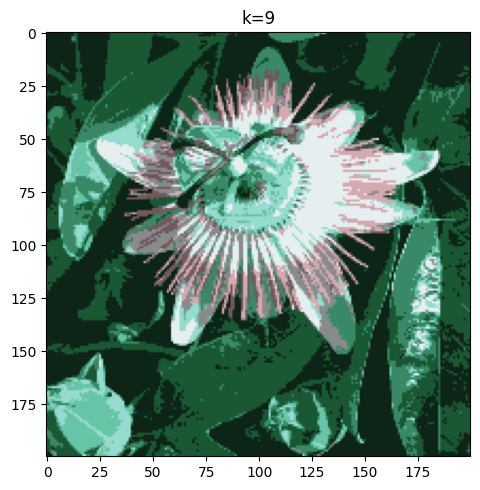

In [ ]:
plt.figure(figsize=(15, 5))  # Adjust the figure size here
# Reduce colors and display reduced image
k_values = [ 9]  # You can add more values as needed
for i, k in enumerate(k_values):
    reduced_image = reduce_colors(small_image, k)
    plt.subplot(1, len(k_values) + 1, i + 2)
    plt.imshow(cv2.cvtColor(reduced_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(f'k={k}')
plt.tight_layout()
plt.show()

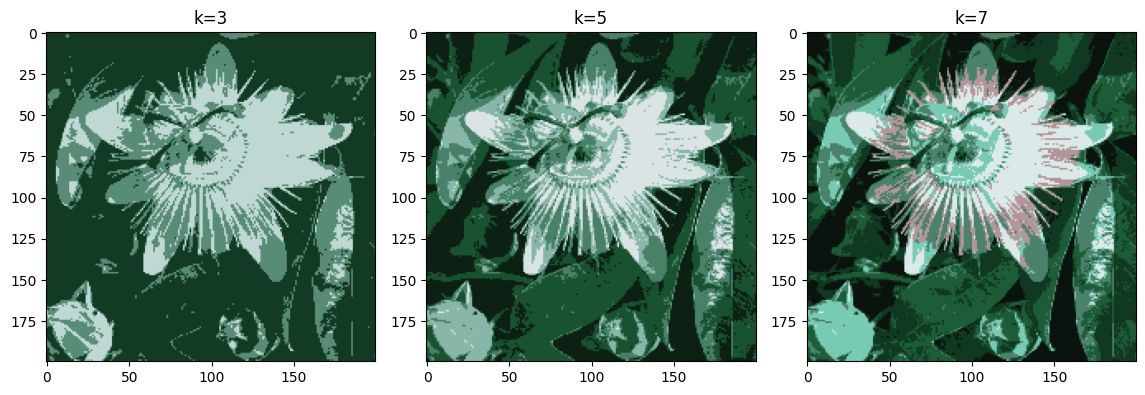

In [ ]:
plt.figure(figsize=(15, 5))  # Adjust the figure size here
# Reduce colors and display reduced image
k_values = [3, 5, 7]  # You can add more values as needed
for i, k in enumerate(k_values):
    reduced_image = reduce_colors(small_image, k)
    plt.subplot(1, len(k_values) + 1, i + 2)
    plt.imshow(cv2.cvtColor(reduced_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(f'k={k}')
plt.tight_layout()
plt.show()

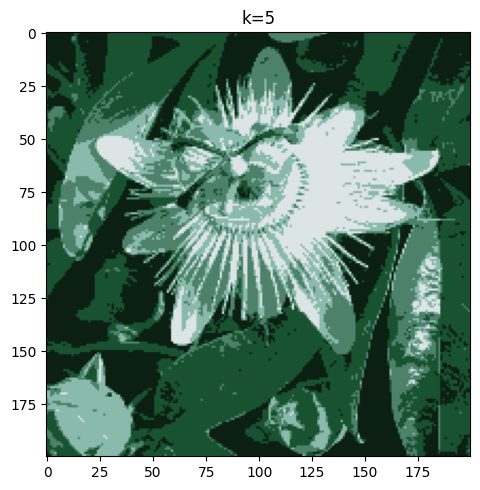

In [ ]:
plt.figure(figsize=(15, 5))  # Adjust the figure size here
# Reduce colors and display reduced image
k_values = [5]  # You can add more values as needed
for i, k in enumerate(k_values):
    reduced_image = reduce_colors(small_image, k)
    plt.subplot(1, len(k_values) + 1, i + 2)
    plt.imshow(cv2.cvtColor(reduced_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(f'k={k}')
plt.tight_layout()
plt.show()

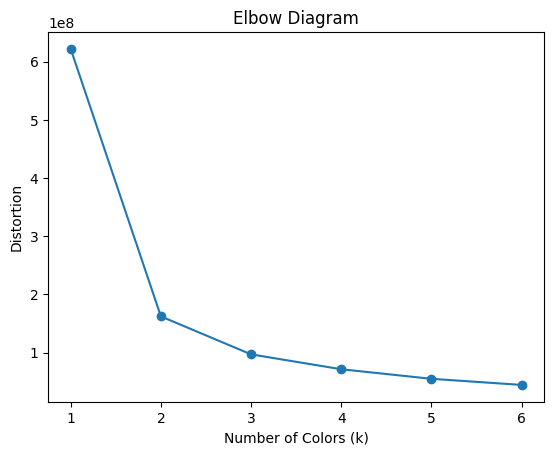

In [ ]:
# Reshape data for elbow diagram
plot_elbow_diagram(pixels)

# **Q2**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

# Preprocess the Data , Convert Categorical Columns to Numeric
label_encoder = LabelEncoder()

data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split the Data into Training and Testing Sets
X = data.drop(['Exited', 'Surname'], axis=1)  # Features, excluding 'Exited' and 'Surname'
y = data['Exited']
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

# Assuming your dataset is loaded and preprocessed (X_train, X_test, y_train, y_test)

# Ensure data types are correct
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

def predict(X_train, y_train, x, k=3):
    distances = np.linalg.norm(X_train - x, axis=1)
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train.iloc[k_indices].values
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

def knn(X_train, y_train, X_test, k=3):
    y_pred = [predict(X_train, y_train, x, k) for _, x in X_test.iterrows()]
    return np.array(y_pred)

k_values = [1, 3, 5, 7, 8, 9]  # different values of k

for k in k_values:
    y_pred_knn = knn(X_train, y_train, X_test, k)

    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"KNN (k={k}) Accuracy: {accuracy_knn}")
    print("\n")

KNN (k=1) Accuracy: 0.673


KNN (k=3) Accuracy: 0.7335


KNN (k=5) Accuracy: 0.767


KNN (k=7) Accuracy: 0.777


KNN (k=8) Accuracy: 0.8


KNN (k=9) Accuracy: 0.791




# **Q3**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Step 2: Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

# Step 3: Preprocess the Data - Convert Categorical Columns to Numeric
label_encoder = LabelEncoder()

data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Step 4: Split the Data into Training and Testing Sets
X = data.drop(['Exited', 'Surname'], axis=1)  # Features, excluding 'Exited' and 'Surname'
y = data['Exited']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply SVM
svm_model = SVC(kernel='linear')  # You can choose a different kernel as well
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8035


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.7835


# **Q4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

             0         1
0    -3.408489  1.728972
1     0.252569 -0.540329
2     5.315146  4.322031
3     4.035171 -3.988881
4    -5.054942  3.837816
...        ...       ...
1495  0.489051 -0.242311
1496 -0.783022  0.545067
1497 -0.155477  1.099182
1498  0.776242  0.518482
1499 -0.552223  0.699230

[1500 rows x 2 columns]


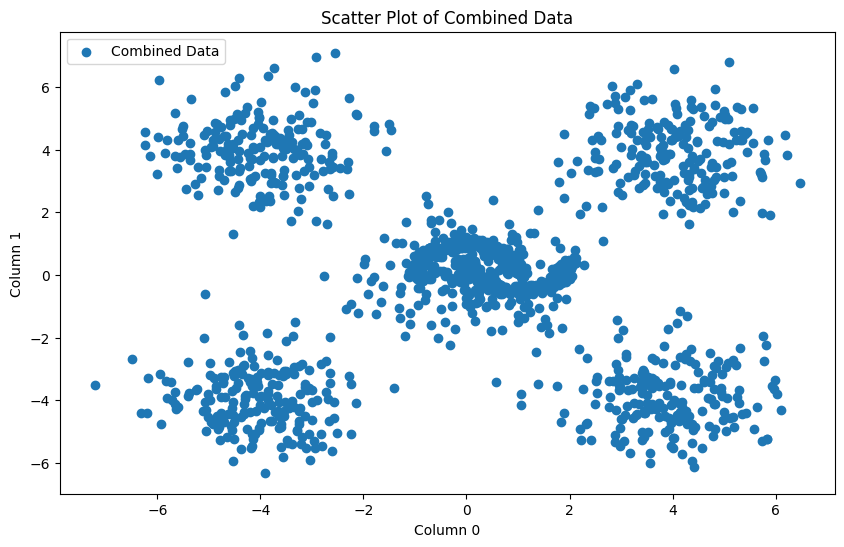

In [ ]:
# Load the datasets
data1 = pd.read_csv("/content/drive/MyDrive/data1.csv", sep=',', header=None, names=['0', '1'], skiprows=1)
data2 = pd.read_csv("/content/drive/MyDrive/data2.csv", sep=',', header=None, names=['0', '1'], skiprows=1)

# Concatenate the datasets vertically
combined_data = pd.concat([data1, data2], axis=0, ignore_index=True)

# Convert the columns to numeric
combined_data['0'] = pd.to_numeric(combined_data['0'], errors='coerce')
combined_data['1'] = pd.to_numeric(combined_data['1'], errors='coerce')
print(combined_data)

plt.figure(figsize=(10, 6))
plt.scatter(combined_data['0'], combined_data['1'], label='Combined Data')

plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.title('Scatter Plot of Combined Data')
plt.legend()

plt.show()

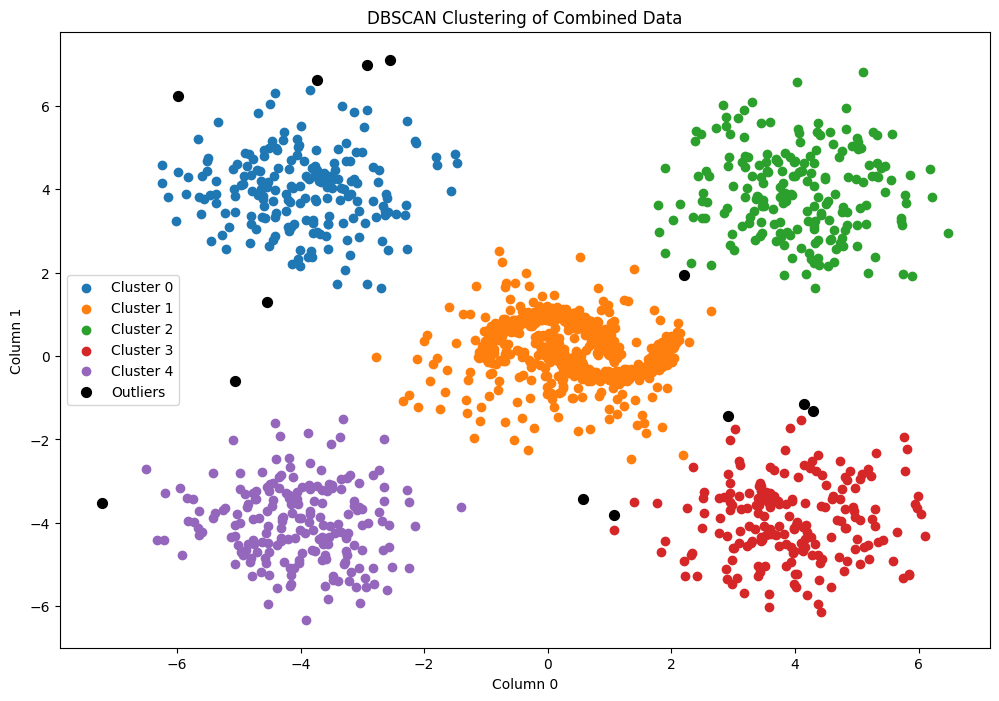

Outliers:
            0         1  Cluster
31  -5.066963 -0.598894       -1
118 -7.210431 -3.522234       -1
225  2.917038 -1.443841       -1
240 -5.977418  6.238649       -1
283  4.286366 -1.312143       -1
512 -2.553486  7.101864       -1
515 -2.917521  6.966250       -1
533  4.137327 -1.153201       -1
547  2.205221  1.954036       -1
706 -4.536169  1.306044       -1
754 -3.728669  6.611365       -1
817  0.575172 -3.425661       -1
876  1.063858 -3.818336       -1


In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data[['0', '1']])

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.31, min_samples=11)
clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the dataframe
combined_data['Cluster'] = clusters

# Plot the clustered data
plt.figure(figsize=(12, 8))
for cluster_label in set(clusters):
    cluster_data = combined_data[combined_data['Cluster'] == cluster_label]
    if cluster_label == -1:
        plt.scatter(cluster_data['0'], cluster_data['1'], label='Outliers', color='black', s=50)
    else:
        plt.scatter(cluster_data['0'], cluster_data['1'], label=f'Cluster {cluster_label}')

plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.title('DBSCAN Clustering of Combined Data')
plt.legend()

plt.show()

# Display outliers
outliers = combined_data[combined_data['Cluster'] == -1]
print("Outliers:")
print(outliers)